In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
file = uproot.open("./data/gm2offline_ana_version15_timecut100.root")
tree = file["farline/evwTree"]

In [3]:
df = tree.pandas.df()
df['timeEastCorrected'] = df['timeEast'] - df['timeCorr']
df.columns = ["runNum","subRunNum","fill","island","caloNum","timeEast","timeWest","deltaT","westX",
                "westY", "eastX","eastY","deltaX","deltaY","energyEast","energyWest","deltaE","timeCorr",
                "timeEastCorrected"]
df.describe()

,runNum,subRunNum,fill,island,caloNum,timeEast,timeWest,deltaT,westX,westY,eastX,eastY,deltaX,deltaY,energyEast,energyWest,deltaE,timeCorr,timeEastCorrected
count,67363.0,67363.0,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000,67363.000000
mean,16368.0,427.0,102.190327,145.708905,12.543815,131347.179126,131347.898084,-0.718958,3.899239,3.038608,3.899239,3.038608,-0.020012,0.000574,781.438632,1200.360654,-418.922022,-0.716362,131347.895488
std,0.0,0.0,58.348195,21.630648,6.906841,50904.321218,50904.320385,0.839567,2.631146,1.283606,2.631146,1.283606,0.525904,0.138378,481.093846,710.320448,310.254008,0.837817,50904.320590
min,16368.0,427.0,2.000000,67.000000,1.000000,80005.529470,80006.420460,-3.029342,0.500000,0.500000,0.500000,0.500000,-6.637033,-2.887337,39.759016,50.689089,-3921.207820,-2.533535,80006.484564
25%,16368.0,427.0,52.000000,131.000000,7.000000,94866.649360,94867.334756,-0.947394,1.500000,2.108615,1.500000,2.108615,-0.067297,-0.039867,363.379973,583.713008,-613.544211,-0.955265,94867.329893
50%,16368.0,427.0,103.000000,146.000000,13.000000,115613.117435,115613.151593,-0.527520,3.589574,3.065872,3.589574,3.065872,-0.010324,0.000000,736.478876,1154.849916,-369.798945,-0.464979,115613.301880
75%,16368.0,427.0,154.000000,160.500000,19.000000,151523.127273,151523.919812,-0.140613,6.064509,4.026762,6.064509,4.026762,0.037275,0.040274,1136.367444,1752.494127,-169.541247,-0.100543,151523.894945
max,16368.0,427.0,201.000000,226.000000,24.000000,534897.648141,534900.050249,1.029536,8.500000,5.500000,8.500000,5.500000,6.014606,3.684061,3560.793926,5100.925144,1042.723708,0.543326,534900.078693


In [7]:
dflite = df.loc[df['energyWest'] > 750].loc[df['energyEast'] < 250]
dflite.describe()

,runNum,subRunNum,fill,island,caloNum,timeEast,timeWest,deltaT,westX,westY,eastX,eastY,deltaX,deltaY,energyEast,energyWest,deltaE,timeCorr,timeEastCorrected
count,462.0,462.0,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,16368.0,427.0,103.318182,145.928571,12.216450,130823.958680,130824.781973,-0.823293,4.348169,3.056501,4.348169,3.056501,-1.820426,0.018010,150.480353,1258.051046,-1107.570692,-0.697428,130824.656107
std,0.0,0.0,58.827411,20.662700,6.464714,50185.417831,50185.417971,0.867961,1.426599,1.443943,1.426599,1.443943,2.784706,0.431069,47.856487,377.195685,382.597001,0.831805,50185.415589
min,16368.0,427.0,2.000000,88.000000,1.000000,80009.178469,80010.346935,-2.947794,1.203560,0.500000,1.203560,0.500000,-6.637033,-2.887337,56.912608,750.157807,-2485.559134,-2.533535,80010.133563
25%,16368.0,427.0,52.000000,131.000000,6.000000,94414.380212,94417.143217,-1.110922,3.298735,1.883639,3.298735,1.883639,-3.731889,-0.131588,112.818704,942.965235,-1336.276163,-0.955093,94416.878565
50%,16368.0,427.0,105.000000,146.000000,13.000000,113294.559112,113296.762999,-0.613411,4.303203,3.005648,4.303203,3.005648,-2.541152,0.008703,144.182906,1206.324534,-1064.840716,-0.502153,113296.989664
75%,16368.0,427.0,154.000000,161.000000,18.000000,153847.317611,153848.380590,-0.276658,5.326731,4.358522,5.326731,4.358522,-1.461218,0.197447,188.545941,1505.097206,-794.683082,-0.100543,153848.355489
max,16368.0,427.0,201.000000,203.000000,24.000000,396487.851680,396487.772138,0.619861,7.895472,5.500000,7.895472,5.500000,6.014606,2.871082,249.122381,2564.893571,-507.785641,0.543326,396487.952222


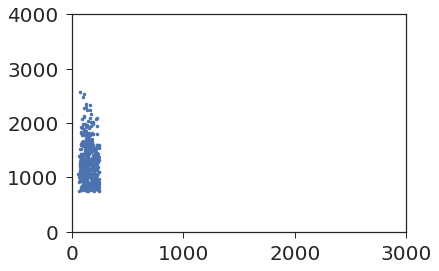

In [16]:
plt.plot(dflite['energyEast'],dflite['energyWest'],'.')
plt.ylim(0,4000)
plt.xlim(0,3000)
plt.show()

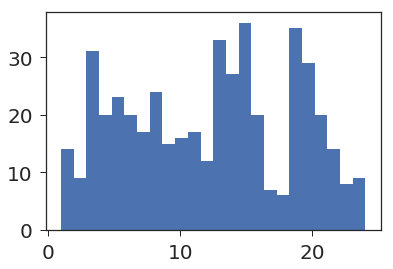

In [19]:
plt.hist(dflite['caloNum'],bins=24)
plt.show()

In [27]:
f = r.TFile("./data/gm2offline_ana_version15_timecut100.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

In [28]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :    67363 : Total =         8386377 bytes  File  Size =    5829985 *
*        :          : Tree compression factor =   1.44                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :    67363 : Total  Size=     270625 bytes  File Size  =       2335 *
*Baskets :        9 : Basket Size=      32000 bytes  Compression= 115.69     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :    67363 : Total  Size=     270664 bytes  File Size  =       2353 *
*Baskets :        9 : Basket Size=      32000 bytes  Compression= 114.82     *
*...................................................

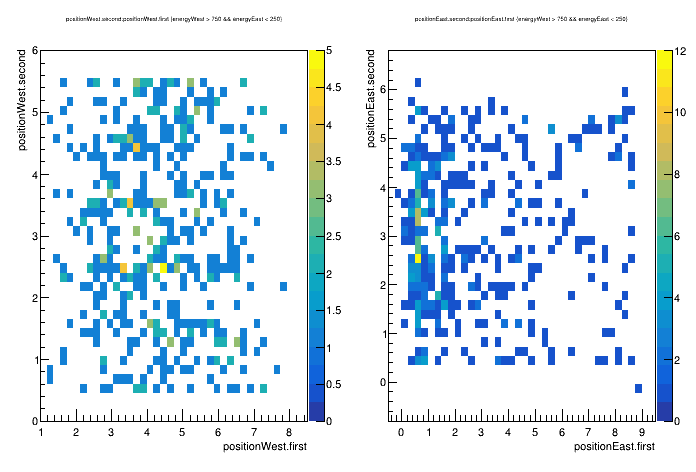

In [30]:
cut = 'energyWest > 750 && energyEast < 250'
c = r.TCanvas()
c.Divide(2)
c.cd(1)
tcomp.Draw("positionWest.second:positionWest.first",cut,"colz")
c.cd(2)
tcomp.Draw("positionEast.second:positionEast.first",cut,"colz")
c.Draw()

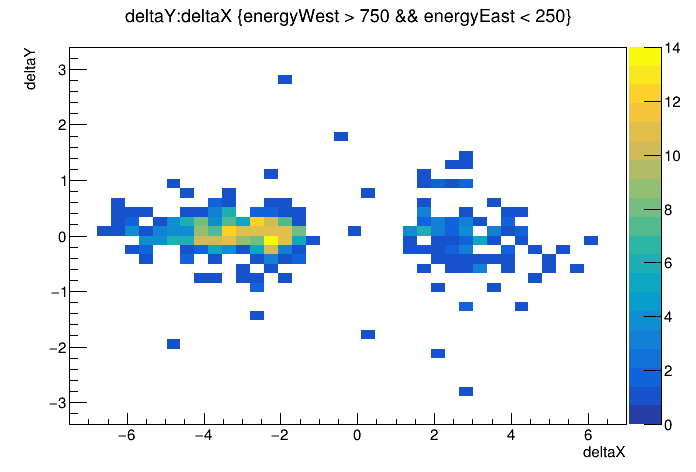

In [36]:
c = r.TCanvas()
tcomp.Draw("deltaY:deltaX",cut,"colz")
c.Draw()